# Îã§ÏùåÏóê Î≥º ÏòÅÌôî ÏòàÏ∏°ÌïòÍ∏∞[ÌîÑÎ°úÏ†ùÌä∏]

### ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [1]:
import datetime as dt
from pathlib import Path
import os
import time
from datetime import datetime
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
- Ïù¥Ï†ÑÏùò SessionIDÏùò Ïó≠Ìï†ÏùÑ UserIDÍ∞Ä Ìï¥Ï§òÏïº Ìï®
- Rating Ï†ïÎ≥¥ Ìè¨Ìï®
  - ÏßÅÏ†Ñ ÏòÅÌôîÍ∞Ä ÎßàÏùåÏóê Îì§ÏóàÎäîÏßÄ -> ÎπÑÏä∑Ìïú ÏòÅÌôîÎ•º Îçî Í≥†Î•¥Í≤å ÌïòÎäî Í≤ÉÍ≥º ÏÉÅÍ¥ÄÏù¥ ÏûàÏùÑ Ïàò ÏûàÏùå
  - RatingÏù¥ ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄÎèÑ Í≥†ÎØº
- Time : UTC Time Ï†ïÎ≥¥ Ìè¨Ìï®
  - 1970ÎÖÑ 1Ïõî 1ÏùºÎ∂ÄÌÑ∞ Í≤ΩÍ≥ºÎêú Ï¥à Îã®ÏúÑ ÏãúÍ∞Ñ Í∏∞Ïû¨

In [2]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data.sort_values(['UserId', 'Time'], inplace=True)  # dataÎ•º idÏôÄ ÏãúÍ∞Ñ ÏàúÏÑúÎ°ú Ï†ïÎ†¨
data

UserId  ItemId  Rating       Time
31            1    3186       4  978300019
22            1    1270       5  978300055
27            1    1721       4  978300055
37            1    1022       5  978300055
24            1    2340       3  978300103
...         ...     ...     ...        ...
1000019    6040    2917       4  997454429
999988     6040    1921       4  997454464
1000172    6040    1784       3  997454464
1000167    6040     161       3  997454486
1000042    6040    1221       4  998315055

[1000209 rows x 4 columns]

<br>
<br>
<br>

### Step 1. Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨

- ItemId Î∂ÑÌè¨ ÌôïÏù∏ÌïòÍ∏∞
  - Ï§ëÍ∞ÑÏóê ÌäÄÎäî countÍ∞Ä ÏûàÍ∏∞Îäî ÌïòÎÇò, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í≥†Î•∏ Ìé∏

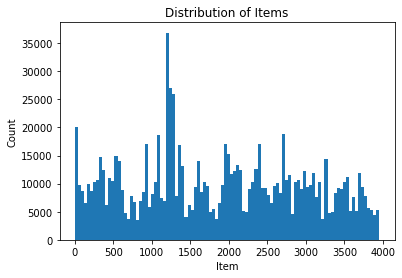

In [5]:
plt.hist(data['ItemId'], bins=100)
plt.title("Distribution of Items")
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()

- Time Î∂ÑÌè¨ ÌôïÏù∏ÌïòÍ∏∞
  - 2000ÎÖÑ 5Ïõî ~ 2021ÎÖÑ 1ÏõîÍπåÏßÄÏùò ÏÇ¨Ïö©ÎüâÏù¥ Í∞ÄÏû• ÎßéÏùå
  - Í∑∏Îü¨ÎÇò, ÏÇ¨Ïö©ÎüâÏù¥ Ï§ÑÏñ¥Îì† Í≤ÉÏùÑ Ï†úÏô∏ÌïòÍ∏∞Î≥¥Îã§Îäî Ï†ÅÏùÄ ÏñëÏù¥ÏßÄÎßå Ìè¨Ìï®ÌïòÎäî Í≤ÉÏúºÎ°ú Ïö∞ÏÑ† ÏãúÎèÑ

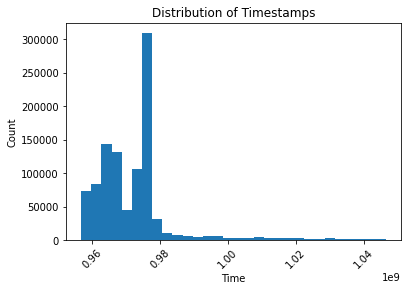

In [6]:
plt.hist(data['Time'], bins=30)
plt.title("Distribution of Timestamps")
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

- UTC timestampÎ•º datetimeÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏÇ¨Ïö©

In [3]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.sort_values(['UserId', 'Time'], inplace=True)

- ÏÑ∏ÏÖò Íµ¨ÏÑ±ÏùÑ Î≥¥ÏïòÏùÑ Îïå 30Î∂ÑÏù¥ ÏßÄÎÇòÎ©¥ -> ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖòÏúºÎ°ú Íµ¨Î∂ÑÌï† Ïàò ÏûàÎèÑÎ°ù Ï¥àÍ∏∞ ÏÑ§Ï†ïÌï¥Î≥¥Í∏∞
  - Google AnalyticsÏùò Í≤ΩÏö∞, 30Î∂ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏ÏÖòÏùÑ Î∂ÑÎ¶¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Ïóê Îî∞Îùº Ï¥àÍ∏∞Îäî 30Î∂ÑÏúºÎ°ú ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏúºÎ°ú Î®ºÏ†Ä ÏÉùÍ∞Å

In [4]:
SESSION_THRESHOLD = pd.Timedelta(minutes=30)

data['SessionId'] = (
    data.groupby('UserId')['Time']
    .apply(lambda x: (x.diff() > SESSION_THRESHOLD).cumsum())
)

data

UserId  ItemId  Rating                Time  SessionId
31            1    3186       4 2000-12-31 22:00:19          0
22            1    1270       5 2000-12-31 22:00:55          0
27            1    1721       4 2000-12-31 22:00:55          0
37            1    1022       5 2000-12-31 22:00:55          0
24            1    2340       3 2000-12-31 22:01:43          0
...         ...     ...     ...                 ...        ...
1000019    6040    2917       4 2001-08-10 14:40:29          7
999988     6040    1921       4 2001-08-10 14:41:04          7
1000172    6040    1784       3 2001-08-10 14:41:04          7
1000167    6040     161       3 2001-08-10 14:41:26          7
1000042    6040    1221       4 2001-08-20 13:44:15          8

[1000209 rows x 5 columns]

<br>

- ÏÑ∏ÏÖò Î∂ÑÌè¨ ÌôïÏù∏

In [9]:
data['SessionId'].value_counts()

0      606773
1      168432
2       75115
3       35396
4       23968
        ...  
289         1
288         1
287         1
286         1
267         1
Name: SessionId, Length: 354, dtype: int64

- Îã§Îßå, 30Î∂ÑÏúºÎ°ú ÏÑ§Ï†ïÏùÑ Ìï¥ÎèÑ Îê†ÏßÄÏóê ÎåÄÌïú Ïó¨Î∂ÄÎ•º Ï∂îÍ∞Ä Î∂ÑÏÑùÌï¥Î¥Ñ
  - 30Î∂ÑÏùÑ ÎÑòÏñ¥Í∞ÄÎäî Í≤ΩÏö∞Îäî 19123 Ï†ïÎèÑÎ°ú Îã§ÏÜå ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ∏ÏÖòÏùÑ 30Î∂ÑÏúºÎ°ú Ï¥àÍ∏∞ ÏÑ§Ï†ïÌï¥ÎèÑ Î¨¥Î∞©Ìï† Í≤ÉÏúºÎ°ú ÌååÏïÖ

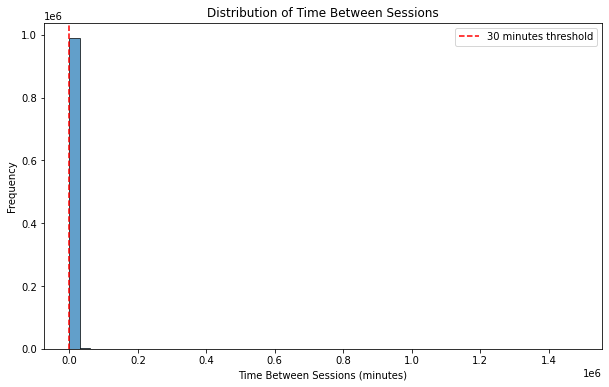

Sessions with time difference <= 30 minutes: 975046
Sessions with time difference > 30 minutes: 19123


In [5]:
# Í∞ôÏùÄ Ïú†Ï†Ä ÏÇ¨Ïù¥ÏóêÏÑúÏùò ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
data['Time'] = pd.to_datetime(data['Time'])
data['Time_diff'] = data.groupby('UserId')['Time'].diff()

time_diff_counts = data['Time_diff'].dt.total_seconds() / 60

# 30Î∂Ñ Ïù¥ÌïòÏôÄ Ï¥àÍ≥ºÌïú Í≤ΩÏö∞ Íµ¨Î∂Ñ
less_than_30min = time_diff_counts[time_diff_counts <= 30]
greater_than_30min = time_diff_counts[time_diff_counts > 30]

# ÏãúÍ∞Ñ Ï∞®Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.hist(time_diff_counts, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=30, color='red', linestyle='--', label="30 minutes threshold")
plt.title('Distribution of Time Between Sessions')
plt.xlabel('Time Between Sessions (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 30Î∂Ñ Ïù¥ÌïòÏôÄ Ï¥àÍ≥ºÌïú Í≤ΩÏö∞Ïùò ÎπàÎèÑ
print(f"Sessions with time difference <= 30 minutes: {len(less_than_30min)}")
print(f"Sessions with time difference > 30 minutes: {len(greater_than_30min)}")

> Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùòÏã¨Ïä§Îü¨Ïö¥ Î∂ÄÎ∂Ñ
- ÌïòÎÇòÏùò UserIdÍ∞Ä Ï†ïÌôïÌûà Í∞ôÏùÄ ÏãúÍ∞ÑÏóê Ïó¨Îü¨ ÏïÑÏù¥ÌÖúÏùÑ Ï°∞ÌöåÌïòÎäî Í≤ÉÏù¥ Í∞ÄÎä•ÌïúÏßÄ Ïó¨Î∂Ä
  - ÎåÄÎ∂ÄÎ∂ÑÏùò Ïú†Ï†ÄÍ∞Ä Ïù¥Ïóê Ìï¥ÎãπÎêòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌï¥ÏÑú Ï≤òÎ¶¨Ìï¥ÏïºÌï† ÏßÄÏóê ÎåÄÌï¥ÏÑú Í≥†ÎØºÏù¥ ÌïÑÏöîÌï¥ Î≥¥ÏûÑ
  - Time Í∏∞Î°ù ÏûêÏ≤¥Î•º Î∞∞Ïπò Ï≤òÎ¶¨ÌïòÏó¨ Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏù¥ Î∞úÏÉùÌñàÏùÑ ÏàòÎèÑ ÏûàÍ≥†, Î∞ÄÎ¶¨Ï¥à Ïù¥Ìïò ÏãúÍ∞Ñ Ï∞®Ïù¥Î•º Î¨¥ÏãúÌïòÍ≤å ÎêòÏñ¥ Î∞úÏÉùÌïú Î¨∏Ï†úÎ°úÎèÑ Ï∂îÏ∂ïÌï¥Î≥º Ïàò ÏûàÏùå
  - Í∑∏Í≤å ÏïÑÎãàÎùºÎ©¥, Ï∂îÏ≤ú ÏãúÏä§ÌÖú ÏûêÏ≤¥Í∞Ä Ïó¨Îü¨ Í∞úÏùò ÏïÑÏù¥ÌÖúÏùÑ ÎèôÏãúÏóê Î≥¥Ïó¨Ï£ºÎäî Í≤ΩÏö∞Í∞Ä ÎßéÍ≥†, Ï∂îÏ≤ú Î™©Î°ùÏùÑ Ïä§ÌÅ¨Î°§ÌïòÎ©∞ ÌôïÏù∏ÌïòÍ≤å Îê† Í≤ΩÏö∞ ÎèôÏãúÏóê Í∏∞Î°ùÎêòÎäî Í≤ÉÏù¥ Í∞ÄÎä•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü¨Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®


<br>

- RatingÏù¥ ÎÇÆÏùÄ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
  - Í∏∞Ï°¥Ïùò ÌÅ¥Î¶≠ Í∏∞Î∞ò Î∂ÑÏÑùÏù¥ ÏïÑÎãå RatingÏùÑ Ïù¥Ïö©Ìïú Î∂ÑÏÑù ÌïÑÏöî
  - ÏµúÏÜå, ÏµúÎåìÍ∞í, Í∞úÏàòÍπåÏßÄ ÌôïÏù∏ÌïòÏó¨ ÏµúÏÜå Í∞úÏàò ÏÑ§Ï†ï ÏãúÎèÑ

In [11]:
data['Rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

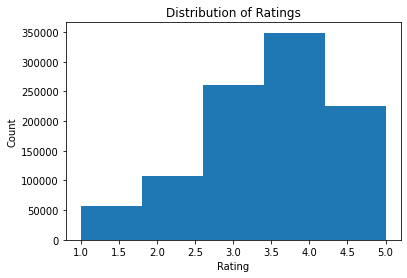

In [12]:
plt.hist(data['Rating'], bins=5)
plt.title("Distribution of Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [13]:
min_rating = data["Rating"].min()
max_rating = data["Rating"].max()

print(f"Rating ÏµúÏÜüÍ∞í ({min_rating}) Í∞úÏàò:", (data["Rating"] == min_rating).sum())
print(f"Rating ÏµúÎåìÍ∞í ({max_rating}) Í∞úÏàò:", (data["Rating"] == max_rating).sum())

Rating ÏµúÏÜüÍ∞í (1) Í∞úÏàò: 56174
Rating ÏµúÎåìÍ∞í (5) Í∞úÏàò: 226310


In [14]:
print(data["Rating"].value_counts().sort_index())

1     56174
2    107557
3    261197
4    348971
5    226310
Name: Rating, dtype: int64


- ÌèâÏ†ê 1Í≥º 2Ïùò Í≤ΩÏö∞, Îã§Î•∏ ÌèâÏ†êÏóê ÎπÑÌï¥ Í∞úÏàòÍ∞Ä Ï†ÅÏùÄ Ìé∏Ïóê ÏÜçÌï¥ Ï†úÍ±∞Ìï¥ÎèÑ Î¨¥Î∞©Ìï† Í≤ÉÏúºÎ°ú ÌåêÎã®

In [6]:
MIN_RATING = 2
filtered_data = data[data['Rating'] >= MIN_RATING]

<br>

- ÏÑ∏ÏÖò Í∏∏Ïù¥ Î∂ÑÏÑù

In [8]:
session_lengths = filtered_data.groupby('SessionId').size()
session_lengths.describe()

count       351.000000
mean       2689.558405
std       32032.626937
min           1.000000
25%           1.000000
50%           8.000000
75%          36.500000
max      573965.000000
dtype: float64

<br>

- 2Í∞ú Ïù¥ÌïòÏùò ÏïÑÏù¥ÌÖúÏùÑ Î≥∏ ÏÑ∏ÏÖòÏùò Í≤ΩÏö∞, ÏÇ¨Ïö©ÏûêÍ∞Ä ÏÑ†Ìò∏ÌïòÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÎ°ú Î¨¥ÏûëÏúÑ Ï†ëÏÜçÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ≥†. Îã§Ïùå ÌñâÎèôÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞Ïóê ÌÅ∞ ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÌïòÏó¨ Ï†úÍ±∞

In [9]:
MIN_SESSION_LENGTH = 2
filtered_data = filtered_data[filtered_data['SessionId'].isin(session_lengths[session_lengths >= MIN_SESSION_LENGTH].index)]

<br>

- ÏµúÏ¢Ö filtered_data ÌôïÏù∏

In [18]:
filtered_data

UserId  ItemId  Rating                Time  SessionId       Time_diff
31            1    3186       4 2000-12-31 22:00:19          0             NaT
22            1    1270       5 2000-12-31 22:00:55          0 0 days 00:00:36
27            1    1721       4 2000-12-31 22:00:55          0 0 days 00:00:00
37            1    1022       5 2000-12-31 22:00:55          0 0 days 00:00:00
24            1    2340       3 2000-12-31 22:01:43          0 0 days 00:00:48
...         ...     ...     ...                 ...        ...             ...
1000019    6040    2917       4 2001-08-10 14:40:29          7 0 days 00:00:31
999988     6040    1921       4 2001-08-10 14:41:04          7 0 days 00:00:35
1000172    6040    1784       3 2001-08-10 14:41:04          7 0 days 00:00:00
1000167    6040     161       3 2001-08-10 14:41:26          7 0 days 00:00:22
1000042    6040    1221       4 2001-08-20 13:44:15          8 9 days 23:02:49

[943946 rows x 6 columns]

<br>
<br>
<br>

### Step 2. ÎØ∏Îãà Î∞∞ÏπòÏùò Íµ¨ÏÑ±
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ `SessionId`Î•º ÏÉùÏÑ±ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥Î•º ÌôúÏö©ÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏßÑÌñâ
  - Ï∂îÌõÑ, ÏÑ±Îä•Ïù¥ Ïûò ÎÇòÏò§ÏßÄ ÏïäÏùÑ Í≤ΩÏö∞, `UserId` Í∏∞Î∞òÏúºÎ°ú Î≥ÄÍ≤Ω ÏãúÎèÑ ÏòàÏ†ï

In [19]:
# ÏÑ∏ÏÖò Îç∞Ïù¥ÌÑ∞Î•º ÎØ∏Îãà Î∞∞ÏπòÎ°ú ÎÇòÎàÑÍ∏∞
def generate_mini_batches(filtered_data, batch_size):
    sessions = filtered_data['SessionId'].unique()
    np.random.shuffle(sessions)
    
    for i in range(0, len(sessions), batch_size):
        batch_sessions = sessions[i:i + batch_size]
        yield filtered_data[filtered_data['SessionId'].isin(batch_sessions)]

# ÎØ∏Îãà Î∞∞Ïπò ÏÉùÏÑ± ÌÖåÏä§Ìä∏
batch_size = 64
for mini_batch in generate_mini_batches(filtered_data, batch_size):
    print(f"Mini batch size: {len(mini_batch)}")
    break

Mini batch size: 6109


In [ ]:
# # UserIdÎ•º ÏÇ¨Ïö©ÌïòÍ≥†Ïûê Ìï† Í≤ΩÏö∞
# mini_batches = []

# for user_id, group in filtered_data.groupby('UserId'):
#     batch = group[['ItemId', 'Rating']].values
#     mini_batches.append(batch)

<br>
<br>
<br>

### Step 3. Î™®Îç∏ Íµ¨ÏÑ±
- GRU4Rec ÏÇ¨Ïö©(RNN Í∏∞Î∞ò Î™®Îç∏)
  - Î™®Îç∏ÏùÑ Î≥ÄÍ≤ΩÌïòÎäî ÏãúÎèÑÎ•º Ìï† Í≤ΩÏö∞, SASRec Î™®Îç∏ or LSTM4Rec Ï†ÅÏö© ÏòàÏ†ï
    - Îã§Îßå SASRec Î™®Îç∏ÏùÄ RNN Í∏∞Î∞ò Î™®Îç∏Ïù¥ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê `GRU4Rec ‚û°Ô∏è LSTM4Rec ‚û°Ô∏è SASRec` ÏàúÏÑúÎ°ú Î≥ÄÍ≤Ω Ï†ÅÏö© ÏãúÎèÑÌï† ÏòàÏ†ï
    - Ï∞∏Í≥† : [kt NexR Í∏∞Ïà†Î∏îÎ°úÍ∑∏_[18] Îî•Îü¨Îãù Í∏∞Î∞ò Ï∂îÏ≤ú ÏãúÏä§ÌÖú: kt NexR Í∏∞Ïà† Î∏îÎ°úÍ∑∏ '21 ÌÖåÌÅ¨Î¶¨Ìè¨Ìä∏](https://tech.nexr.kr/771417b9-e1a0-4c79-8555-0f578c482c25)

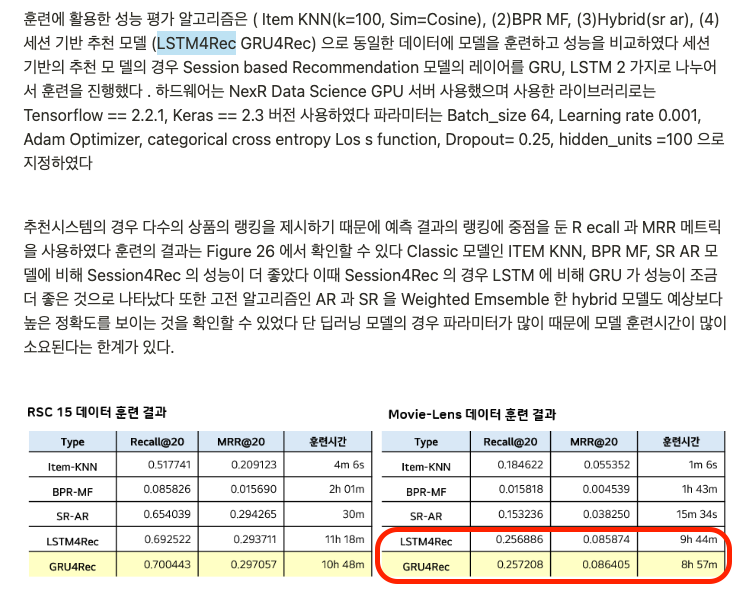

<br>

#### GRU4Rec Íµ¨ÏÑ±
- Í≥†Ïú† ÏïÑÏù¥ÌÖú ÏàòÏùò Í≤ΩÏö∞, Ïù∏Îç±Ïä§Í∞Ä 0Î∂ÄÌÑ∞ ÏãúÏûëÎêòÎäî Í≤ÉÏùÑ Í≥†Î†§ÌïòÏó¨ +1 ÏàòÌñâ
- `hidden_size`Îäî 128Î°ú Ï¥àÍ∏∞ ÏÑ§Ï†ï
- Ï∂úÎ†• ÌÅ¨Í∏∞Îäî ÏïÑÏù¥ÌÖú ÏàòÏôÄ ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ï

In [14]:
import torch
import torch.nn as nn

class GRU4Rec(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU4Rec, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
input_size = filtered_data['ItemId'].nunique() + 1
hidden_size = 128
output_size = input_size

model = GRU4Rec(input_size, hidden_size, output_size)

model

GRU4Rec(
  (embedding): Embedding(3676, 128)
  (gru): GRU(128, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3676, bias=True)
)

<br>
<br>
<br>

### Step 4. Î™®Îç∏ ÌïôÏäµ
- Ï¥àÍ∏∞ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï ÌõÑ, Ïã§ÌóòÏùÑ ÌÜµÌï¥ Î≥ÄÍ≤ΩÌïòÍ∏∞

In [15]:
learning_rate = 0.001
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 64

- filtered_dataÏóêÏÑú train_data Ï™ºÍ∞úÍ∏∞

In [84]:
train_data = filtered_data[['SessionId', 'ItemId']].groupby('SessionId')['ItemId'].apply(list)

- epoch, loss ÏÑ§Ï†ïÌï¥ ÌïôÏäµ ÏßÑÌñâ

In [18]:
for epoch in range(epochs):
    total_loss = 0
    for session in train_data:
        for i in range(0, len(session) - 1, batch_size):
            batch_session = session[i:i + batch_size]
            inputs = torch.tensor(batch_session[:-1]).unsqueeze(0)  # ÎßàÏßÄÎßâ ÏïÑÏù¥ÌÖú Ï†úÏô∏
            targets = torch.tensor(batch_session[1:]).unsqueeze(0)  # Ï≤´ Î≤àÏß∏ ÏïÑÏù¥ÌÖú Ï†úÏô∏

            # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤¥ÌÅ¨(IndexError Î∞©ÏßÄ)
            inputs = torch.clamp(inputs, 0, input_size - 1)
            targets = torch.clamp(targets, 0, input_size - 1)
            outputs = model(inputs)
            loss = loss_fn(outputs.view(-1, output_size), targets.view(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

Epoch 1/10, Loss: 89107.96316075325
Epoch 2/10, Loss: 82709.32528591156
Epoch 3/10, Loss: 80924.81061577797
Epoch 4/10, Loss: 79862.96364831924
Epoch 5/10, Loss: 79119.63238668442
Epoch 6/10, Loss: 78557.52835571766
Epoch 7/10, Loss: 78108.93370461464
Epoch 8/10, Loss: 77750.60621845722
Epoch 9/10, Loss: 77455.04295873642
Epoch 10/10, Loss: 77223.18368005753


- LossÍ∞íÏù¥ Îã§ÏÜå ÌÅ¨Í≤å ÎÇòÏò¥ ‚û°Ô∏è ÌïôÏäµÎ•†Ïù¥ Îã§ÏÜå ÌÅ¨ÏßÄ ÏïäÏùÑÍπå Ï∂îÏ∏°Îê®, Îî∞ÎùºÏÑú ÌïôÏäµÎ•†ÏùÑ ÎÇÆÏ∂îÍ∏∞ ÏúÑÌï¥ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º 1e-4Ï†ïÎèÑÎ°ú Ï§ÑÏó¨Î≥¥Îäî ÏãúÎèÑÎ•º Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ
  - Ïö∞ÏÑ†, Î™®Îç∏ ÌÖåÏä§Ìä∏Î∂ÄÌÑ∞ ÏßÑÌñâ

<br>
<br>
<br>

### Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏(1)
- Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î≥ÑÎèÑÎ°ú Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÏßÄ ÏïäÍ≥†, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞ÄÌï† ÏòàÏ†ï!

In [21]:
# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (Recall@K, MRR@K)
def recall_mrr_k(model, test_data, k=20):
    recalls = []
    mrrs = []
    for session in test_data:
        inputs = torch.tensor(session[:-1]).unsqueeze(0)
        targets = session[1:]

        # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
        inputs = torch.clamp(inputs, 0, input_size - 1)
        
        outputs = model(inputs).squeeze(0).detach().numpy()
        top_k = np.argsort(outputs, axis=1)[:, -k:]

        for i, target in enumerate(targets):
            if target in top_k[i]:
                recalls.append(1)
                rank = np.where(top_k[i] == target)[0][0] + 1
                mrrs.append(1 / rank)
            else:
                recalls.append(0)
                mrrs.append(0)

    return np.mean(recalls), np.mean(mrrs)

In [22]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
recall, mrr = recall_mrr_k(model, test_data)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

Recall@20: 0.3607, MRR@20: 0.0448


#### 1Ï∞® Î™®Îç∏ÎßÅ Í≤∞Í≥º
- `Recall@20`Ïù¥ ÏïΩ 36% Ï†ïÎèÑÎ°ú ÎÇòÏôîÍ≥†, ÏïÑÏ£º ÎÇÆÏßÄÎäî ÏïäÏßÄÎßå ÎÜíÎã§Í≥† Î≥º Ïàò ÏóÜÎäî ÏÑ±Îä•ÏûÑ.
- `MRR@20`Ïùò Í≤ΩÏö∞, ÌèâÍ∑†Ï†ÅÏù∏ ÏàòÏπòÎ•º ÎÇ∏ Í≤ÉÏúºÎ°ú ÌåêÎã®.

<br>
<br>
<br>

### Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏(2)
#### ÏÑ∏ÏÖò Í∏∞Ï§Ä Î≥ÄÍ≤Ω Î∞è ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÍ≤Ω ÌõÑ Ïû¨ÏãúÎèÑ
- ÏÑ∏ÏÖò Í∏∞Ï§ÄÏùÑ 1ÏãúÍ∞ÑÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Î≥¥Í∏∞

In [85]:
SESSION_THRESHOLD = pd.Timedelta(minutes=60)

In [24]:
# learning_rate = 0.0005
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) # lr Ï§ÑÏù¥Í∏∞
batch_size = 64
dropout_rate = 0.2 # ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©

In [20]:
train_data = filtered_data[['SessionId', 'ItemId']].groupby('SessionId')['ItemId'].apply(list)

In [26]:
for epoch in range(epochs):
    total_loss = 0
    for session in train_data:
        for i in range(0, len(session) - 1, batch_size):
            batch_session = session[i:i + batch_size]
            inputs = torch.tensor(batch_session[:-1]).unsqueeze(0)  # ÎßàÏßÄÎßâ ÏïÑÏù¥ÌÖú Ï†úÏô∏
            targets = torch.tensor(batch_session[1:]).unsqueeze(0)  # Ï≤´ Î≤àÏß∏ ÏïÑÏù¥ÌÖú Ï†úÏô∏

            # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤¥ÌÅ¨(IndexError Î∞©ÏßÄ)
            inputs = torch.clamp(inputs, 0, input_size - 1)
            targets = torch.clamp(targets, 0, input_size - 1)
            outputs = model(inputs)
            loss = loss_fn(outputs.view(-1, output_size), targets.view(-1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

Epoch 1/10, Loss: 75599.8981936872
Epoch 2/10, Loss: 74279.6155655384
Epoch 3/10, Loss: 73859.07812801003
Epoch 4/10, Loss: 73594.73442906141
Epoch 5/10, Loss: 73395.75992369652
Epoch 6/10, Loss: 73229.43417394161
Epoch 7/10, Loss: 73086.51083016396
Epoch 8/10, Loss: 72956.94933849573
Epoch 9/10, Loss: 72840.42700362206
Epoch 10/10, Loss: 72729.29730373621


In [34]:
# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (Recall@K, MRR@K)
def recall_mrr_k(model, test_data, k=20):
    recalls = []
    mrrs = []
    for session in test_data:
        inputs = torch.tensor(session[:-1]).unsqueeze(0)
        targets = session[1:]

        # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
        inputs = torch.clamp(inputs, 0, input_size - 1)
        
        outputs = model(inputs).squeeze(0).detach().numpy()
        top_k = np.argsort(outputs, axis=1)[:, -k:]

        for i, target in enumerate(targets):
            if target in top_k[i]:
                recalls.append(1)
                rank = np.where(top_k[i] == target)[0][0] + 1
                mrrs.append(1 / rank)
            else:
                recalls.append(0)
                mrrs.append(0)

    return np.mean(recalls), np.mean(mrrs)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
recall, mrr = recall_mrr_k(model, test_data)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

Recall@20: 0.3999, MRR@20: 0.0469


<br>
<br>
<br>

### Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏(3)
- Î™®Îç∏ Î≥ÄÍ≤Ω : `GRU4Rec` ‚û°Ô∏è `LSTM4Rec`
  - ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî ÎèôÏùºÌïú ÌååÎùºÎØ∏ÌÑ∞Îäî 2Î≤àÍ≥º ÎèôÏùºÌïòÍ≤å Í≥†Ï†ïÌïòÍ≥†, Î™®Îç∏Ïóê Îî∞Îùº Ï∂îÍ∞ÄÎêòÎäî ÌååÎùºÎØ∏ÌÑ∞Îäî Î≥ÑÎèÑÎ°ú Ï∂îÍ∞Ä

In [88]:
import torch
import torch.nn as nn

class LSTM4Rec(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, dropout_rate=0.2, num_layers=1):
        super(LSTM4Rec, self).__init__()

        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.embedding(x)
        x, (hn, cn) = self.lstm(x)
        x = self.dropout(x)
        x = self.fc(x)  # ÏãúÌÄÄÏä§ Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÏàòÌñâ (Î∞∞Ïπò ÌÅ¨Í∏∞, ÏãúÌÄÄÏä§ Í∏∏Ïù¥, Ï∂úÎ†• ÌÅ¨Í∏∞)
        return x

In [89]:
vocab = sorted(set(data['ItemId'].values))

In [90]:
model = LSTM4Rec(input_size, embedding_size, hidden_size, output_size, dropout_rate, num_layers)

In [91]:
epochs = 10
input_size = len(vocab)  # ÏïÑÏù¥ÌÖúÏùò Ïàò (vocab ÌÅ¨Í∏∞)
output_size = len(vocab)  # Ï∂úÎ†• ÌÅ¨Í∏∞ (ÏïÑÏù¥ÌÖú Ïàò)

embedding_size = 128
hidden_size = 128
batch_size = 64

dropout_rate = 0.2
num_layers = 1  # LSTM Î†àÏù¥Ïñ¥ Ïàò
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [27]:
# # ÏÜêÏã§ Ìï®Ïàò
# loss_fn = nn.CrossEntropyLoss()

# # ÌïôÏäµ
# for epoch in range(epochs):
#     total_loss = 0
#     for session in train_data:
#         for i in range(0, len(session) - 1, batch_size):
#             batch_session = session[i:i + batch_size]
#             inputs = torch.tensor(batch_session[:-1])
#             targets = torch.tensor(batch_session[1:])

#             # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding layer Î≤îÏúÑ ÎÇ¥Ïóê ÏûàÎèÑÎ°ù Ï°∞Ï†ï(IndexError Î∞©ÏßÄ)
#             inputs = torch.clamp(inputs, 0, input_size - 1)
#             targets = torch.clamp(targets, 0, input_size - 1)

#             # LSTM ÏûÖÎ†•Ïóê ÎßûÍ≤å Ï∞®Ïõê ÎßûÏ∂îÍ∏∞
#             inputs = inputs.unsqueeze(0)
#             targets = targets.unsqueeze(0)

#             outputs = model(inputs)

#             outputs = outputs.view(-1, output_size)
#             targets = targets.view(-1)

#             loss = loss_fn(outputs, targets)

#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             total_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

Epoch 1/10, Loss: 105693.45828819275
Epoch 2/10, Loss: 96765.48223376274
Epoch 3/10, Loss: 92241.21271586418
Epoch 4/10, Loss: 89728.75692796707
Epoch 5/10, Loss: 88064.23286986351
Epoch 6/10, Loss: 86876.81271195412
Epoch 7/10, Loss: 85950.3028459549
Epoch 8/10, Loss: 85198.7843079567
Epoch 9/10, Loss: 84588.54621386528
Epoch 10/10, Loss: 84065.55984950066


In [93]:
# Ïª§ÎÑê Ïù¥ÏäàÎ°ú Ïû¨Ïã§Ìñâ
# ÏÜêÏã§ Ìï®Ïàò
loss_fn = nn.CrossEntropyLoss()

# ÌïôÏäµ
for epoch in range(epochs):
    total_loss = 0
    for session in train_data:
        for i in range(0, len(session) - 1, batch_size):
            batch_session = session[i:i + batch_size]
            inputs = torch.tensor(batch_session[:-1])
            targets = torch.tensor(batch_session[1:])

            # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding layer Î≤îÏúÑ ÎÇ¥Ïóê ÏûàÎèÑÎ°ù Ï°∞Ï†ï(IndexError Î∞©ÏßÄ)
            inputs = torch.clamp(inputs, 0, input_size - 1)
            targets = torch.clamp(targets, 0, input_size - 1)

            # LSTM ÏûÖÎ†•Ïóê ÎßûÍ≤å Ï∞®Ïõê ÎßûÏ∂îÍ∏∞
            inputs = inputs.unsqueeze(0)
            targets = targets.unsqueeze(0)

            outputs = model(inputs)

            outputs = outputs.view(-1, output_size)
            targets = targets.view(-1)

            loss = loss_fn(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

Epoch 1/10, Loss: 87926.24275875092
Epoch 2/10, Loss: 86820.9829890728
Epoch 3/10, Loss: 85924.01674580574
Epoch 4/10, Loss: 85189.65595126152
Epoch 5/10, Loss: 84559.53745746613
Epoch 6/10, Loss: 84053.89250636101
Epoch 7/10, Loss: 83605.34282183647
Epoch 8/10, Loss: 83224.61079335213
Epoch 9/10, Loss: 82857.94791293144
Epoch 10/10, Loss: 82548.3940346241


- Î©îÎ™®Î¶¨ Ï¥àÍ≥º Ïù¥Ïäà
  - Î∞∞Ïπò unsqueezeÎ•º 0ÏúºÎ°ú ÏßÄÏ†ï, Î™®Îç∏Ïóê ÎßûÍ≤å Î∂àÌïÑÏöîÌïú ÏΩîÎìú ÏÇ≠Ï†úÌïòÏó¨ Ïû¨Ïã§Ìñâ

In [97]:
# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (Recall@K, MRR@K)
def recall_mrr_k(model, test_data, k=20):
    recalls = []
    mrrs = []
    for session in test_data:
        # ÏÑ∏ÏÖòÏùÑ Î™®Îç∏Ïóê ÎßûÍ≤å Ï≤òÎ¶¨
        inputs = torch.tensor(session[:-1]).unsqueeze(0)  # Add batch and time dimension
        targets = session[1:]

        # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
        inputs = torch.clamp(inputs, 0, input_size - 1)
        
        # Î™®Îç∏ Ï∂úÎ†• Í≥ÑÏÇ∞
        outputs = model(inputs).squeeze(0).detach().numpy()

        # Top-k ÏòàÏ∏° Í∞í Ï∂îÏ∂ú (NumPyÎ•º ÏÇ¨Ïö©Ìïú Ìö®Ïú®Ï†ÅÏù∏ Ïó∞ÏÇ∞)
        top_k = np.argsort(outputs)[-k:]

        for i, target in enumerate(targets):
            if target in top_k:
                recalls.append(1)
                rank = np.where(top_k == target)[0][0] + 1
                mrrs.append(1 / rank)
            else:
                recalls.append(0)
                mrrs.append(0)

    return np.mean(recalls), np.mean(mrrs)

- Ïã§Ìñâ Ïãú, Ïª§ÎÑêÏù¥ Ï§ëÏßÄÎêòÎäî Ïù¥ÏäàÍ∞Ä ÏûàÏñ¥ Ï∂îÌõÑ Ìï¥Í≤∞Ìï† ÏòàÏ†ïüòÖ

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
test_data_list = test_data.tolist()
recall, mrr = recall_mrr_k(model, test_data_list)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

<br>
<br>
<br>

### Step 5. Î™®Îç∏ ÌÖåÏä§Ìä∏(4)
- Î™®Îç∏ : `GRU4Rec` Ïù¥Ïö©
- ÎìúÎ°≠ÏïÑÏõÉÏùÑ 0.2ÏóêÏÑú 0.1Î°ú Í∞êÏÜåÏãúÌÇ§Í∏∞
- learning_rateÎ•º ÎèôÏ†ÅÏúºÎ°ú Ï°∞Ï†ïÌïòÎäî Î∞©ÏãùÏùÑ Ï†ÅÏö©
  - `torch.optim.lr_scheduler`

In [21]:
SESSION_THRESHOLD = pd.Timedelta(minutes=60)

In [23]:
import torch
import torch.nn as nn

class GRU4Rec(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU4Rec, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output)
        return output

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
input_size = filtered_data['ItemId'].nunique() + 1
hidden_size = 128
output_size = input_size

model = GRU4Rec(input_size, hidden_size, output_size)

model

GRU4Rec(
  (embedding): Embedding(3676, 128)
  (gru): GRU(128, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3676, bias=True)
)

In [27]:
epochs = 10
loss_fn = nn.CrossEntropyLoss()
batch_size = 64
dropout_rate = 0.1 # ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # lr Ï§ÑÏù¥Í∏∞
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

In [30]:
train_data = filtered_data[['SessionId', 'ItemId']].groupby('SessionId')['ItemId'].apply(list)

In [30]:
for epoch in range(epochs):
    total_loss = 0
    for session in train_data:
        for i in range(0, len(session) - 1, batch_size):
            batch_session = session[i:i + batch_size]
            inputs = torch.tensor(batch_session[:-1]).unsqueeze(0)  # ÎßàÏßÄÎßâ ÏïÑÏù¥ÌÖú Ï†úÏô∏
            targets = torch.tensor(batch_session[1:]).unsqueeze(0)  # Ï≤´ Î≤àÏß∏ ÏïÑÏù¥ÌÖú Ï†úÏô∏

            # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤¥ÌÅ¨(IndexError Î∞©ÏßÄ)
            inputs = torch.clamp(inputs, 0, input_size - 1)
            targets = torch.clamp(targets, 0, input_size - 1)
            
            # inputs = inputs.unsqueeze(2)
            targets = targets.squeeze(0).view(-1)
            
            outputs = model(inputs)
            loss = loss_fn(outputs.view(-1, output_size), targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
    
    scheduler.step(total_loss)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss}")

Epoch 1/10, Loss: 104159.39842271805
Epoch 2/10, Loss: 94633.57082772255
Epoch 3/10, Loss: 90191.1409676075
Epoch 4/10, Loss: 87655.85948181152
Epoch 5/10, Loss: 85975.47580695152
Epoch 6/10, Loss: 84753.35161876678
Epoch 7/10, Loss: 83802.76826190948
Epoch 8/10, Loss: 83030.18741965294
Epoch 9/10, Loss: 82380.90259933472
Epoch 10/10, Loss: 81820.9533610344


In [31]:
# ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞ (Recall@K, MRR@K)
def recall_mrr_k(model, test_data, k=20):
    recalls = []
    mrrs = []
    for session in test_data:
        inputs = torch.tensor(session[:-1]).unsqueeze(0)
        targets = session[1:]

        # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤òÎ¶¨
        inputs = torch.clamp(inputs, 0, input_size - 1)
        
        outputs = model(inputs).squeeze(0).detach().numpy()
        top_k = np.argsort(outputs, axis=1)[:, -k:]

        for i, target in enumerate(targets):
            if target in top_k[i]:
                recalls.append(1)
                rank = np.where(top_k[i] == target)[0][0] + 1
                mrrs.append(1 / rank)
            else:
                recalls.append(0)
                mrrs.append(0)

    return np.mean(recalls), np.mean(mrrs)

In [32]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
recall, mrr = recall_mrr_k(model, test_data)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

Recall@20: 0.2417, MRR@20: 0.0328


<br>
<br>
<br>

#### Î≤àÏô∏) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï∂îÍ∞Ä_ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ Ïù¥Ïö©Ìï¥ Îπ†Î•¥Í≤å ÌïôÏäµ + ÏΩîÎìú Î¶¨Ìå©ÌÜ†ÎßÅ(Ìï®ÏàòÌôî)
- Time Ïª¨ÎüºÏóêÏÑú 2000ÎÖÑ 5Ïõî ~ 2021ÎÖÑ 1ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
- ItemIdÏùò Ïù¥ÏÉÅÏπò Ï†úÍ±∞: countÍ∞Ä 30000Ïù¥ÏÉÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
- ÏÑ∏ÏÖòÏùÄ 30Î∂ÑÏúºÎ°ú ÏÑ§Ï†ï
- GRU4Rec Î™®Îç∏ ÏÇ¨Ïö©
- ÎØ∏Îãà Î∞∞Ïπò ÏÇ¨Ïö©
```python
# ÏÑ∏ÏÖò Îç∞Ïù¥ÌÑ∞Î•º ÎØ∏Îãà Î∞∞ÏπòÎ°ú ÎÇòÎàÑÍ∏∞
def generate_mini_batches(filtered_data, batch_size):
    sessions = filtered_data['SessionId'].unique()
    np.random.shuffle(sessions)
    
    for i in range(0, len(sessions), batch_size):
        batch_sessions = sessions[i:i + batch_size]
        yield filtered_data[filtered_data['SessionId'].isin(batch_sessions)]
# ÎØ∏Îãà Î∞∞Ïπò ÏÉùÏÑ± ÌÖåÏä§Ìä∏
batch_size = 64
for mini_batch in generate_mini_batches(filtered_data, batch_size):
    print(f"Mini batch size: {len(mini_batch)}")
    break
```

In [10]:
# 2000ÎÖÑ 5Ïõî ~ 2021ÎÖÑ 1Ïõî ÏÇ¨Ïù¥Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
filtered_data = filtered_data[(filtered_data['Time'] >= '2000-05-01') & (filtered_data['Time'] <= '2021-01-31')]

In [11]:
# Í∞Å ItemIdÏùò Îì±Ïû• ÌöüÏàòÎ•º Í≥ÑÏÇ∞
item_counts = filtered_data['ItemId'].value_counts()

# Îì±Ïû• ÌöüÏàòÍ∞Ä 30000 Ïù¥ÏÉÅÏù∏ ItemIdÎ•º ÌïÑÌÑ∞ÎßÅ
valid_item_ids = item_counts[item_counts < 30000].index
filtered_data = filtered_data[filtered_data['ItemId'].isin(valid_item_ids)]

In [12]:
# ÏÑ∏ÏÖò Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ TimeÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌïòÍ≥† 30Î∂Ñ Í∞ÑÍ≤©ÏúºÎ°ú ÎÇòÎàÑÍ∏∞
filtered_data['Time_diff'] = filtered_data.groupby('SessionId')['Time'].diff().fillna(pd.Timedelta(seconds=0))
filtered_data['New_SessionId'] = (filtered_data['Time_diff'] > pd.Timedelta(minutes=30)).cumsum() + 1

# ÏÉàÎ°úÏö¥ ÏÑ∏ÏÖò IDÎ°ú Îç∞Ïù¥ÌÑ∞ Í∑∏Î£πÌôî
filtered_data['SessionId'] = filtered_data['New_SessionId']
filtered_data = filtered_data.drop(columns=['Time_diff', 'New_SessionId'])

In [13]:
filtered_data

UserId  ItemId  Rating                Time  SessionId
31            1    3186       4 2000-12-31 22:00:19          1
22            1    1270       5 2000-12-31 22:00:55          1
27            1    1721       4 2000-12-31 22:00:55          1
37            1    1022       5 2000-12-31 22:00:55          1
24            1    2340       3 2000-12-31 22:01:43          1
...         ...     ...     ...                 ...        ...
1000019    6040    2917       4 2001-08-10 14:40:29       9171
999988     6040    1921       4 2001-08-10 14:41:04       9171
1000172    6040    1784       3 2001-08-10 14:41:04       9171
1000167    6040     161       3 2001-08-10 14:41:26       9171
1000042    6040    1221       4 2001-08-20 13:44:15       9172

[933089 rows x 5 columns]

In [14]:
# ÎØ∏Îãà Î∞∞Ïπò ÏÉùÏÑ± Ìï®Ïàò
def generate_mini_batches(filtered_data, batch_size):
    sessions = filtered_data['SessionId'].unique()
    np.random.shuffle(sessions)

    for i in range(0, len(sessions), batch_size):
        batch_sessions = sessions[i:i + batch_size]
        yield filtered_data[filtered_data['SessionId'].isin(batch_sessions)]

# ÎØ∏Îãà Î∞∞Ïπò ÏÉùÏÑ± ÌÖåÏä§Ìä∏
batch_size = 64
for mini_batch in generate_mini_batches(filtered_data, batch_size):
    print(f"Mini batch size: {len(mini_batch)}")
    break

Mini batch size: 5896


In [21]:
epochs = 10
batch_size = 64
embedding_size = 50
hidden_size = 128
learning_rate = 1e-4
output_size = input_size

In [23]:
import torch
import torch.nn as nn

class GRU4Rec(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, dropout_rate=0.1):
        super(GRU4Rec, self).__init__()
        
        # Embedding Layer
        self.embedding = nn.Embedding(input_size, embedding_size)
        
        # GRU Layer
        self.gru = nn.GRU(embedding_size, hidden_size, batch_first=True, dropout=dropout_rate)
        
        # Fully Connected Layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: [batch_size, sequence_length]
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output[:, -1, :])  # ÎßàÏßÄÎßâ ÏãúÌÄÄÏä§Îßå Ïì∞Í∏∞
        return output

In [24]:
model = GRU4Rec(input_size=input_size, embedding_size=embedding_size, hidden_size=hidden_size, output_size=output_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
def train(model, train_data, optimizer, loss_fn, batch_size, input_size, output_size, epochs):
    for epoch in range(epochs):
        total_loss = 0
        for session in train_data:
            for i in range(0, len(session) - 1, batch_size):
                batch_session = session[i:i + batch_size]

                # Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä batch_sizeÎ≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞Î•º Ï≤òÎ¶¨
                if len(batch_session) < batch_size:
                    continue  # Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä ÏûëÏúºÎ©¥ Ìï¥Îãπ Î∞∞ÏπòÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.

                inputs = torch.tensor(batch_session[:-1])  # ÎßàÏßÄÎßâ ÏïÑÏù¥ÌÖú Ï†úÏô∏
                targets = torch.tensor(batch_session[1:])  # Ï≤´ Î≤àÏß∏ ÏïÑÏù¥ÌÖú Ï†úÏô∏

                # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤¥ÌÅ¨(IndexError Î∞©ÏßÄ)
                inputs = torch.clamp(inputs, 0, input_size - 1)
                targets = torch.clamp(targets, 0, input_size - 1)

                # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä
                batch_size_actual = len(batch_session) - 1  # Ïã§Ï†ú Î∞∞Ïπò ÌÅ¨Í∏∞
                inputs = inputs.view(batch_size_actual, -1)  # Ïã§Ï†ú Î∞∞Ïπò ÌÅ¨Í∏∞Ïóê ÎßûÍ≤å Î∑∞ ÏàòÏ†ï
                targets = targets.view(-1)  # ÌÉÄÍ≤üÏùÄ 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò

                # Î™®Îç∏ Ï∂úÎ†•ÏùÄ (batch_size, sequence_length, output_size) ÌòïÌÉú
                outputs = model(inputs)

                # outputsÎ•º (batch_size * sequence_length, output_size) ÌòïÌÉúÎ°ú reshape
                outputs = outputs.view(-1, output_size)

                # ÏÜêÏã§ Í≥ÑÏÇ∞
                loss = loss_fn(outputs, targets)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

        # EpochÎßàÎã§ Ï∂úÎ†•
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

In [28]:
# ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïòÎäî Ìï®Ïàò
def evaluate(model, test_data, k=20):
    recall, mrr = recall_mrr_k(model, test_data, k)  # Recall@k, MRR@k Í≥ÑÏÇ∞
    return recall, mrr

In [31]:
# ÌïôÏäµÏùÑ ÏãúÏûëÌïòÎäî Î∂ÄÎ∂Ñ
train(model, train_data, optimizer, loss_fn, batch_size, input_size, output_size, epochs)

Epoch 1/10, Loss: 92102.7699
Epoch 2/10, Loss: 88855.4000
Epoch 3/10, Loss: 86167.9288
Epoch 4/10, Loss: 84127.9231
Epoch 5/10, Loss: 82708.3322
Epoch 6/10, Loss: 81661.1278
Epoch 7/10, Loss: 80853.2084
Epoch 8/10, Loss: 80207.3839
Epoch 9/10, Loss: 79675.4203
Epoch 10/10, Loss: 79226.3202


In [33]:
import torch
import numpy as np

def recall_mrr_k(model, test_data, k=20):
    recall = 0.0
    mrr = 0.0
    num_samples = len(test_data)
    
    # ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞ ÌôïÏù∏ (Í∞ÄÏû• ÌÅ∞ Ïù∏Îç±Ïä§Î•º Íµ¨Ìï®)
    max_index = model.embedding.num_embeddings - 1
    
    for session in test_data:
        inputs = torch.tensor(session[:-1], dtype=torch.long)  # dtype Ï∂îÍ∞Ä
        targets = torch.tensor(session[1:], dtype=torch.long)  # dtype Ï∂îÍ∞Ä

        # Ïù∏Îç±Ïä§Î•º ÏûÑÎ≤†Îî© Î≤îÏúÑ ÎÇ¥Î°ú ÌÅ¥Î¶¨Ìïë
        max_index = model.embedding.num_embeddings - 1
        inputs = torch.clamp(inputs, 0, max_index)
        inputs = inputs.unsqueeze(-1)

        outputs = model(inputs).squeeze(0).detach().numpy()

        if len(outputs.shape) == 1:
            outputs = outputs.reshape(1, -1)

        top_k = np.argsort(outputs, axis=1)[:, -k:]

        for i, target in enumerate(targets):
            target_idx = np.where(top_k[i] == target.item())[0]
            if len(target_idx) > 0:
                recall += 1.0
                mrr += 1.0 / (target_idx[0] + 1)

    recall /= num_samples
    mrr /= num_samples
    
    return recall, mrr

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
recall, mrr = recall_mrr_k(model, test_data)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

Recall@20: 20.6930, MRR@20: 2.5885


<br>
<br>
<br>

- Í∑∏Î¶¨ÎìúÏÑúÏπò, ÎûúÎç§ ÏÑúÏπòÏùò Í≤ΩÏö∞ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î†§, OptunaÎ°ú Îπ†Î•¥Í≤å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏãúÎèÑ

In [35]:
!pip install optuna

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 383 kB 4.5 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 92.4 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 233 kB 70.1 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 78 kB 12.9 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 597 kB 64.8 MB/s            
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [36]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim

# GRU4Rec Î™®Îç∏ Ï†ïÏùò (Í∏∞Ï°¥Ïóê ÏÇ¨Ïö©ÌïòÎçò Î™®Îç∏)
class GRU4Rec(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRU4Rec, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])  # ÎßàÏßÄÎßâ ÏãúÌÄÄÏä§Ïùò Ï∂úÎ†•ÏùÑ ÏÇ¨Ïö©
        return out

# Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
def create_model(input_size, output_size, learning_rate, hidden_size, batch_size, num_layers):
    model = GRU4Rec(input_size, hidden_size, output_size, num_layers)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

# ÌïôÏäµ Ìï®Ïàò
def train(model, train_data, optimizer, loss_fn, batch_size, epochs):
    model.train()
    total_loss = 0
    for session in train_data:
        for i in range(0, len(session) - 1, batch_size):
            batch_session = session[i:i + batch_size]
            if len(batch_session) < batch_size:
                continue

            inputs = torch.tensor(batch_session[:-1])
            targets = torch.tensor(batch_session[1:])
            inputs = torch.clamp(inputs, 0, input_size - 1)
            targets = torch.clamp(targets, 0, input_size - 1)

            inputs = inputs.view(len(batch_session) - 1, -1)
            targets = targets.view(-1)

            outputs = model(inputs)
            outputs = outputs.view(-1, output_size)

            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
    return total_loss

# ÏÑ±Îä• ÌèâÍ∞Ä Ìï®Ïàò
def evaluate(model, test_data, k=20):
    recall, mrr = recall_mrr_k(model, test_data, k)
    return recall, mrr

# Objective Ìï®Ïàò (OptunaÍ∞Ä ÏµúÏÜåÌôî/ÏµúÎåÄÌôîÌïòÎ†§Îäî ÎåÄÏÉÅ)
def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    hidden_size = trial.suggest_int('hidden_size', 64, 512)
    num_layers = trial.suggest_int('num_layers', 1, 3)
    epochs = trial.suggest_int('epochs', 5, 20)

    # Î™®Îç∏Í≥º ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÉùÏÑ±
    model, optimizer = create_model(input_size, output_size, learning_rate, hidden_size, batch_size, num_layers)
    
    # ÏÜêÏã§ Ìï®Ïàò ÏÑ§Ï†ï
    loss_fn = nn.CrossEntropyLoss()

    # Î™®Îç∏ ÌïôÏäµ
    total_loss = train(model, train_data, optimizer, loss_fn, batch_size, epochs)

    # ÏÑ±Îä• ÌèâÍ∞Ä
    recall, mrr = evaluate(model, test_data, k=20)
    return recall  # ÏÑ±Îä•ÏùÑ ÏµúÎåÄÌôîÌïòÎ†§Î©¥ recall Í∞íÏùÑ Î∞òÌôò

# OptunaÏùò Ïó∞Íµ¨ Í∞ùÏ≤¥ ÏÉùÏÑ±
study = optuna.create_study(direction='maximize')  # maximizeÎ°ú ÏÑ±Îä•ÏùÑ ÏµúÎåÄÌôî
study.optimize(objective, n_trials=50)  # 50Î≤àÏùò Ïã§Ìóò ÏßÑÌñâ
# study.optimize(objective, n_trials=20)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print(f"Best parameters: {study.best_params}")
print(f"Best score: {study.best_value}")

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ÏùÑ Ïû¨ÌïôÏäµÌïòÍ≥† ÏÑ±Îä• ÌèâÍ∞Ä
best_params = study.best_params
model, optimizer = create_model(input_size, output_size, best_params['learning_rate'], best_params['hidden_size'],
                                best_params['batch_size'], best_params['num_layers'])

# Ïû¨ÌïôÏäµÏùÑ ÏúÑÌï¥ Î™®Îç∏ÏùÑ ÌïôÏäµ
loss_fn = nn.CrossEntropyLoss()
train_loss = train(model, train_data, optimizer, loss_fn, best_params['batch_size'], best_params['epochs'])

# ÏÑ±Îä• ÌèâÍ∞Ä
recall, mrr = evaluate(model, test_data, k=20)
print(f"Final performance with best parameters: Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

[I 2025-01-20 10:06:36,962] A new study created in memory with name: no-name-3dfbff0f-dab7-4a21-9832-d525fb00e692
[I 2025-01-20 10:19:51,748] Trial 0 finished with value: 14.252453653217012 and parameters: {'learning_rate': 3.246181938615428e-05, 'batch_size': 32, 'hidden_size': 502, 'num_layers': 1, 'epochs': 6}. Best is trial 0 with value: 14.252453653217012.
[I 2025-01-20 10:22:13,954] Trial 1 finished with value: 21.064885496183205 and parameters: {'learning_rate': 0.0014894415574204425, 'batch_size': 64, 'hidden_size': 147, 'num_layers': 1, 'epochs': 20}. Best is trial 1 with value: 21.064885496183205.
[I 2025-01-20 10:34:03,189] Trial 2 finished with value: 11.90567066521265 and parameters: {'learning_rate': 3.700759775528409e-05, 'batch_size': 32, 'hidden_size': 380, 'num_layers': 2, 'epochs': 7}. Best is trial 1 with value: 21.064885496183205.
[I 2025-01-20 10:36:36,681] Trial 3 finished with value: 5.127044711014177 and parameters: {'learning_rate': 1.8990005923606406e-05, 'ba

KeyboardInterrupt: 

In [39]:
# # ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©

# # ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
# best_params = {
#     'learning_rate': 0.0003940252326285291,
#     'batch_size': 32,
#     'hidden_size': 401,
#     'num_layers': 1,
#     'epochs': 16
# }

In [51]:
epochs = 16
batch_size = 32
embedding_size = 50
hidden_size = 401
learning_rate = 0.0003940252326285291
output_size = input_size
num_layers = 1

In [53]:
import torch
import torch.nn as nn

class GRU4Rec(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, dropout_rate=0.1):
        super(GRU4Rec, self).__init__()
        
        # Embedding Layer
        self.embedding = nn.Embedding(input_size, embedding_size)
        
        # GRU Layer
        self.gru = nn.GRU(embedding_size, hidden_size, batch_first=True, dropout=dropout_rate)
        
        # Fully Connected Layer
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # x: [batch_size, sequence_length]
        x = self.embedding(x)
        output, _ = self.gru(x)
        output = self.fc(output[:, -1, :])  # ÎßàÏßÄÎßâ ÏãúÌÄÄÏä§Îßå Ïì∞Í∏∞
        return output

In [54]:
model = GRU4Rec(input_size=input_size, embedding_size=embedding_size, hidden_size=hidden_size, output_size=output_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [55]:
def train(model, train_data, optimizer, loss_fn, batch_size, input_size, output_size, epochs):
    for epoch in range(epochs):
        total_loss = 0
        for session in train_data:
            for i in range(0, len(session) - 1, batch_size):
                batch_session = session[i:i + batch_size]

                # Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä batch_sizeÎ≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞Î•º Ï≤òÎ¶¨
                if len(batch_session) < batch_size:
                    continue  # Î∞∞Ïπò ÌÅ¨Í∏∞Í∞Ä ÏûëÏúºÎ©¥ Ìï¥Îãπ Î∞∞ÏπòÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.

                inputs = torch.tensor(batch_session[:-1])  # ÎßàÏßÄÎßâ ÏïÑÏù¥ÌÖú Ï†úÏô∏
                targets = torch.tensor(batch_session[1:])  # Ï≤´ Î≤àÏß∏ ÏïÑÏù¥ÌÖú Ï†úÏô∏

                # ÏïÑÏù¥ÌÖú IDÍ∞Ä Embedding Ï∏µÏùò Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï≤¥ÌÅ¨(IndexError Î∞©ÏßÄ)
                inputs = torch.clamp(inputs, 0, input_size - 1)
                targets = torch.clamp(targets, 0, input_size - 1)

                # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä
                batch_size_actual = len(batch_session) - 1  # Ïã§Ï†ú Î∞∞Ïπò ÌÅ¨Í∏∞
                inputs = inputs.view(batch_size_actual, -1)  # Ïã§Ï†ú Î∞∞Ïπò ÌÅ¨Í∏∞Ïóê ÎßûÍ≤å Î∑∞ ÏàòÏ†ï
                targets = targets.view(-1)  # ÌÉÄÍ≤üÏùÄ 1Ï∞®Ïõê Î≤°ÌÑ∞Î°ú Î≥ÄÌôò

                # Î™®Îç∏ Ï∂úÎ†•ÏùÄ (batch_size, sequence_length, output_size) ÌòïÌÉú
                outputs = model(inputs)

                # outputsÎ•º (batch_size * sequence_length, output_size) ÌòïÌÉúÎ°ú reshape
                outputs = outputs.view(-1, output_size)

                # ÏÜêÏã§ Í≥ÑÏÇ∞
                loss = loss_fn(outputs, targets)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

        # EpochÎßàÎã§ Ï∂úÎ†•
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

In [56]:
# ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏàòÌñâÌïòÎäî Ìï®Ïàò
def evaluate(model, test_data, k=20):
    recall, mrr = recall_mrr_k(model, test_data, k)  # Recall@k, MRR@k Í≥ÑÏÇ∞
    return recall, mrr

In [57]:
# ÌïôÏäµÏùÑ ÏãúÏûëÌïòÎäî Î∂ÄÎ∂Ñ
train(model, train_data, optimizer, loss_fn, batch_size, input_size, output_size, epochs)

Epoch 1/16, Loss: 182294.8231
Epoch 2/16, Loss: 169761.8003
Epoch 3/16, Loss: 165403.4636
Epoch 4/16, Loss: 162875.3186
Epoch 5/16, Loss: 161152.3668
Epoch 6/16, Loss: 159877.9236
Epoch 7/16, Loss: 158886.2782
Epoch 8/16, Loss: 158088.8047
Epoch 9/16, Loss: 157432.4378
Epoch 10/16, Loss: 156882.5401
Epoch 11/16, Loss: 156415.3390
Epoch 12/16, Loss: 156013.5779
Epoch 13/16, Loss: 155664.8203
Epoch 14/16, Loss: 155359.1243
Epoch 15/16, Loss: 155088.5198
Epoch 16/16, Loss: 154847.2024


In [58]:
import torch
import numpy as np

def recall_mrr_k(model, test_data, k=20):
    recall = 0.0
    mrr = 0.0
    num_samples = len(test_data)
    
    # ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞ ÌôïÏù∏ (Í∞ÄÏû• ÌÅ∞ Ïù∏Îç±Ïä§Î•º Íµ¨Ìï®)
    max_index = model.embedding.num_embeddings - 1
    
    for session in test_data:
        inputs = torch.tensor(session[:-1], dtype=torch.long)  # dtype Ï∂îÍ∞Ä
        targets = torch.tensor(session[1:], dtype=torch.long)  # dtype Ï∂îÍ∞Ä

        # Ïù∏Îç±Ïä§Î•º ÏûÑÎ≤†Îî© Î≤îÏúÑ ÎÇ¥Î°ú ÌÅ¥Î¶¨Ìïë
        max_index = model.embedding.num_embeddings - 1
        inputs = torch.clamp(inputs, 0, max_index)
        inputs = inputs.unsqueeze(-1)

        outputs = model(inputs).squeeze(0).detach().numpy()

        if len(outputs.shape) == 1:
            outputs = outputs.reshape(1, -1)

        top_k = np.argsort(outputs, axis=1)[:, -k:]

        for i, target in enumerate(targets):
            target_idx = np.where(top_k[i] == target.item())[0]
            if len(target_idx) > 0:
                recall += 1.0
                mrr += 1.0 / (target_idx[0] + 1)

    recall /= num_samples
    mrr /= num_samples
    
    return recall, mrr

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
test_data = train_data.sample(frac=0.2)
recall, mrr = recall_mrr_k(model, test_data)
print(f"Recall@20: {recall:.4f}, MRR@20: {mrr:.4f}")

Recall@20: 27.9378, MRR@20: 3.6684


<br>
<br>
<br>

# ÏµúÏ¢Ö Í≤∞Í≥º ÎπÑÍµê
#### 1. ÏÑ∏ÏÖò Í∏∞Ï§Ä 30Î∂Ñ, GRU4Rec Î™®Îç∏
- Epoch `10`ÏóêÏÑú ÏµúÏÜå Loss:`77223.18368005753`Î°ú Ï†ïÎ¶¨Îê®
- `Recall@20: 0.3607, MRR@20: 0.0448`
- ‚à¥ RecallÏùÄ ÏïΩ 36%, MRRÏùÄ ÏïΩ 0.04Î°ú Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏÑ±Îä•ÏùÑ ÎÇ∏Îã§Í≥† Í≤∞Î°†

<br>

#### 2. ÏÑ∏ÏÖò Í∏∞Ï§Ä 60Î∂Ñ, GRU4Rec Î™®Îç∏
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ : ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö© Î∞è learing_rateÎ•º `1e-4`Î°ú ÏûëÍ≤å ÏÑ§Ï†ïÌïòÏó¨ Ïû¨ÌïôÏäµ
- Epoch `10`ÏóêÏÑú ÏµúÏÜå Loss:`72729.29730373621`Î°ú Ï†ïÎ¶¨Îê®
- `Recall@20: 0.3999, MRR@20: 0.0469`
- ‚à¥ RecallÏùÄ ÏïΩ 40%(Ïù¥Ï†ÑÎ≥¥Îã§ ÏÉÅÏäπ), MRRÏùÄ 0.04Î°ú Recall ÏúÑÏ£ºÎ°ú ÏÑ±Îä• ÏÉÅÏäπÎê®ÏúºÎ°ú Í≤∞Î°†

<br>

#### 3. ÏÑ∏ÏÖò Í∏∞Ï§Ä 60Î∂Ñ, Î™®Îç∏ Î≥ÄÍ≤Ω: GRU4Rec ‚û°Ô∏è LSTM4Rec
- Ïù¥Ï†ÑÏóê Ï∞æÏïòÎçò [kt NexR Í∏∞Ïà†Î∏îÎ°úÍ∑∏ ÏûêÎ£å](https://tech.nexr.kr/771417b9-e1a0-4c79-8555-0f578c482c25)ÏóêÏÑúÎèÑ Ïïå Ïàò ÏûàÎìØ, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôúÏö©Ìï¥ Ïã§ÌóòÌïú Í≤∞Í≥ºÏôÄ Ïú†ÏÇ¨ÌïòÍ≤å, GRU3Rec Î™®Îç∏Ïù¥ Í∑ºÏÜåÌïòÍ≤å Îçî ÏûòÎÇòÏò¥ÏùÑ Ïïå Ïàò ÏûàÏóàÏùå
- Epoch `10`ÏóêÏÑú ÏµúÏÜå Loss:`84065.55984950066`Î°ú Ï†ïÎ¶¨Îê®(Ïª§ÎÑê Ïù¥ÏäàÎ°ú Ïû¨Ïã§Ìñâ ÌõÑ LossÎäî "82548.3940346241")
  - Loss Í∞íÏùò ÏãúÏûëÏù¥ ÏïÑÏ£º ÌÅ¨ÏßÄÎßå, Í∑∏ÎßåÌÅº Í∞êÏÜåÌè≠Ïù¥ ÌÅ¨Í≤å ÏûëÏö©ÌïòÏòÄÏùå
- ‚à¥ <span style="background-color:#FFE6E6">Îã§Îßå, Î©îÎ™®Î¶¨ Ï¥àÍ≥º Ïù¥ÏäàÎ°ú Ïù∏Ìï¥ ÏÑ±Îä• ÏßÄÌëúÎ•º ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÏßÄ Î™ªÌï®.</span>

<br>

#### 4. ÏÑ∏ÏÖò Í∏∞Ï§Ä 60Î∂Ñ, GRU4Rec Î™®Îç∏, ÎìúÎ°≠ÏïÑÏõÉ Í∞êÏÜå, lr ÎèôÏ†Å Ï°∞Ï†ï Ï†ÅÏö©
- Î™®Îç∏ : Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò GRU4RecÎ°ú Îã§Ïãú Î≥ÄÍ≤Ω
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ : ÎìúÎ°≠ÏïÑÏõÉÏùÑ 0.2 -> 0.1Î°ú Ï°∞Ï†ï,learing_rateÎ•º ÎèôÏ†ÅÏúºÎ°ú Ï°∞Ï†ïÌïòÏó¨ Ïû¨ÌïôÏäµ
- Epoch `10`ÏóêÏÑú ÏµúÏÜå Loss:`81820.9533610344`Î°ú Ï†ïÎ¶¨Îê®
- `Recall@20: 0.2417, MRR@20: 0.0328`
- ‚à¥ RecallÏùÄ ÏïΩ 24%(ÌïòÎùΩ), MRRÏùÄ 0.03ÏúºÎ°ú Ïó≠Ïãú ÌïòÎùΩ

<br>


---
- Î≤àÏô∏
    - RecallÏùÄ ÏïΩ 21%, MRRÏùÄ 2.58 Ï†ïÎèÑÎ°ú ÎÇÆÏùÄ ÏÑ±Îä•
    - Loss Ïó≠Ïãú 79226.3202 Ï†ïÎèÑÎ°ú ÌÅ¨Í≤å Í∞úÏÑ†Ï†ê ÏóÜÏùå
    - ÌäúÎãù Í≤∞Í≥ºÎèÑ Ïú†ÏÇ¨
      - ÌäúÎãùÏúºÎ°ú ÎÇòÏò® ÏàòÏπòÎ•º Ï†ÅÏö©ÌñàÏúºÎÇò, 2Î≤à ÏºÄÏù¥Ïä§ÎßåÌÅºÏùò ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥ÏßÄ Î™ªÌñàÏúºÎ©∞ LossÍ∞Ä ÌÅº
        - RecallÏùÄ ÏïΩ 28%, MRRÏùÄ 0.04Ï†ïÎèÑÎ°ú ÌÅ¨Í≤å Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå
      ```python
        epochs = 16
        batch_size = 32
        embedding_size = 50
        hidden_size = 401
        learning_rate = 0.0003940252326285291
        output_size = input_size
        num_layers = 1
      ```
---

<br>

### ÏµúÏ¢Ö Í≤∞Î°†: 2Î≤àÏß∏ ÏºÄÏù¥Ïä§Í∞Ä Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ
- ÏÑ∏ÏÖò Í∏∞Ï§Ä : 60Î∂Ñ
- Î™®Îç∏ : GRU4Rec
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
```python
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) # lr Ï§ÑÏù¥Í∏∞
batch_size = 64
dropout_rate = 0.2 # ÎìúÎ°≠ÏïÑÏõÉ Ï†ÅÏö©
```

<br>
<br>
<br>

# ÌöåÍ≥†
Movie Lens Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎ©∞ Ïö∞ÏÑ† Î®ºÏ†Ä Ïù¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Î¨¥ÏóáÏù∏ÏßÄÏóê ÎåÄÌï¥ÏÑú Ï∞æÏïÑÎ≥¥Îäî Îç∞Ïóê ÏãúÍ∞ÑÏùÑ ÎßéÏù¥ ÏèüÏïòÎçò Í≤É Í∞ôÏäµÎãàÎã§.
- [MovieLens](https://grouplens.org/datasets/movielens/)
- [kaggle/MovieLens 20M Dataset](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset)
- [tistory.com/Content Based Filtering(CB)-3.ÏΩîÎìúÏôÄ Ìï®Íªò Ïù¥Ìï¥ÌïòÍ∏∞[MovieLens Îç∞Ïù¥ÌÑ∞]](https://david-skawns.tistory.com/4)

Ïù¥ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥ ÏõêÎûòÏùò movielens Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Í∞ÄÏßÑ ÌäπÏßï Ï§ëÏóêÏÑú, ÌòÑÏû¨ Ï†úÍ≥µÎ∞õÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÌäπÏßïÎì§ÏùÑ Ï†ïÎ¶¨ÌñàÏäµÎãàÎã§.
> - u.data : featureÎäî userId, movieId, rating, timestampÎ°ú Íµ¨ÏÑ±
>   - Ïú†Ï†Ä Ï†ïÎ≥¥, ÏòÅÌôî Ï†ïÎ≥¥, ÌèâÏ†ê, ÏãúÍ∞ÑÏúºÎ°ú Íµ¨ÏÑ±
> - u.item : ÏòÅÌôî(ÏïÑÏù¥ÌÖú)Ïùò Î©îÌÉÄ Ï†ïÎ≥¥ ‚û°Ô∏è ItemIdÎ°úÎßå Ï†úÍ≥µ Î∞õÏùå


Ï¥ù 3Í∞ÄÏßÄ Î≤ÑÏ†Ñ(Î™®Îç∏ Î≥ÄÍ≤Ω Ïãú Î©îÎ™®Î¶¨ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÏßÄ Î™ªÌï¥ 3Î≤àÏß∏ ÌÖåÏä§Ìä∏Îäî Í≤∞Í≥ºÎ•º ÎÇ¥ÏßÄ Î™ªÌï®)ÏúºÎ°ú Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌï¥Î¥§ÎäîÎç∞ Í≤∞Î°†Ï†ÅÏúºÎ°ú RacallÏù¥ ÏÉÅÏäπÌïòÎ©∞ LossÍ∞Ä Ï§ÑÏñ¥Îì† Ï†ê, MRRÎèÑ Ï†êÏ†ê Ïò¨Î¶¨Í∞Ñ Ï†êÏúºÎ°ú ÎØ∏Î£®Ïñ¥Î¥§ÏùÑ Îïå, ÌäúÎãùÏù¥ Îçî ÏßÑÌñâÎêúÎã§Î©¥ Îçî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇº Í≤ÉÏúºÎ°ú ÏµúÏ¢Ö ÌååÏïÖÌï† Ïàò ÏûàÏóàÏñ¥Ïöî.
<br>
Îã§Îßå, ÏÉÅÏäπÌè≠Ïù¥ Îß§Ïö∞ ÏûëÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Í≥ºÏó∞ Ïú†ÏùòÎØ∏ÌïúÍ∞Ä?Ïóê ÎåÄÌïú ÏßàÎ¨∏ÏóêÎäî ÏïÑÏßÅÏùÄ..ÏïÑÎãàÏò§ÎùºÍ≥† ÎåÄÎãµÏùÑ Ìï¥ÏïºÌï† Í≤É Í∞ôÏïÑ Îã§ÏÜå ÏïÑÏâΩÏäµÎãàÎã§.
<br>

ÎòêÌïú ÌïôÏäµÏùÑ ÏãúÌÇ§Îäî Îç∞Ïóê ÏûàÏñ¥ÏÑú ÏïÑÏâ¨Ïõ†Îçò Ï†êÏùÄ, EpochÏóê ÏûàÏñ¥ÏÑú early stoppingÏùÑ Í±∏Ïñ¥Ï§¨ÏúºÎ©¥ Ï°∞Í∏à Îçî Îπ†Î•¥Í≤å ÌÖåÏä§Ìä∏Î•º Ïó¨Îü¨ Î≤à ÏßÑÌñâÌï¥Î≥º Ïàò ÏûàÏóàÏùÑ Í≤É Í∞ôÏïÑ Ïù¥Î•º ÎØ∏Î¶¨ ÏÉùÍ∞ÅÌï¥Î≥¥ÏßÄ Î™ªÌóÄÎçò Ï†êÏù¥ ÏïÑÏâ¨Ïõ†ÏäµÎãàÎã§.

Ïù¥ Î∂ÄÎ∂ÑÎì§ÏùÑ Îçî Î∞òÏòÅÌïòÏó¨ Ïã§Ï†ú grouplensÏóêÏÑú Ï†úÍ≥µÌïòÎäî MovieLensÎ•º Ïù¥Ïö©Ìï¥ ÏòÅÌôî Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏùÑ Íµ¨ÌòÑÌï¥Î≥¥Í≥† Ïã∂ÏäµÎãàÎã§..!

<br>

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î•º Ï°∞Í∏à Îçî ÏßÑÌñâÌï¥ÏÑú Í≤∞Í≥ºÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Î¥§ÎäîÎç∞, ÏïÑÎ¨¥ÎûòÎèÑ ÏòàÏ∏°Ìïú Î≤îÏúÑÍ∞Ä ÏïÑÎãå ÎìØÌïòÏó¨ Ïó¨Ï†ÑÌûà ÏïÑÏâ¨Ïö¥ ÏÑ±Îä•ÏùÑ ÎÇ¥Í≥† ÏûàÏäµÎãàÎã§. Îã§Î•∏ Î∞©Î≤ïÏùÑ Í∞ïÍµ¨Ìï¥ÏïºÍ≤†ÏäµÎãàÎã§üòÖ